<a href="https://colab.research.google.com/github/myoungsuk/-kmeans-image-clustering/blob/master/kmeans_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(321, 481, 3)


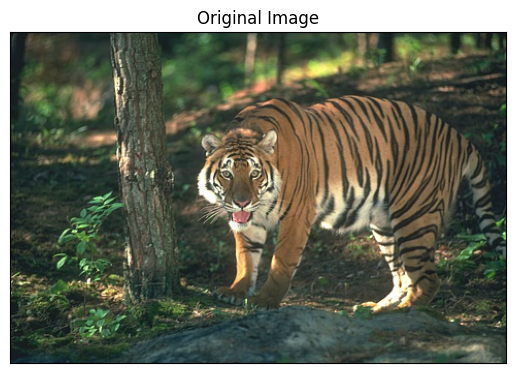

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


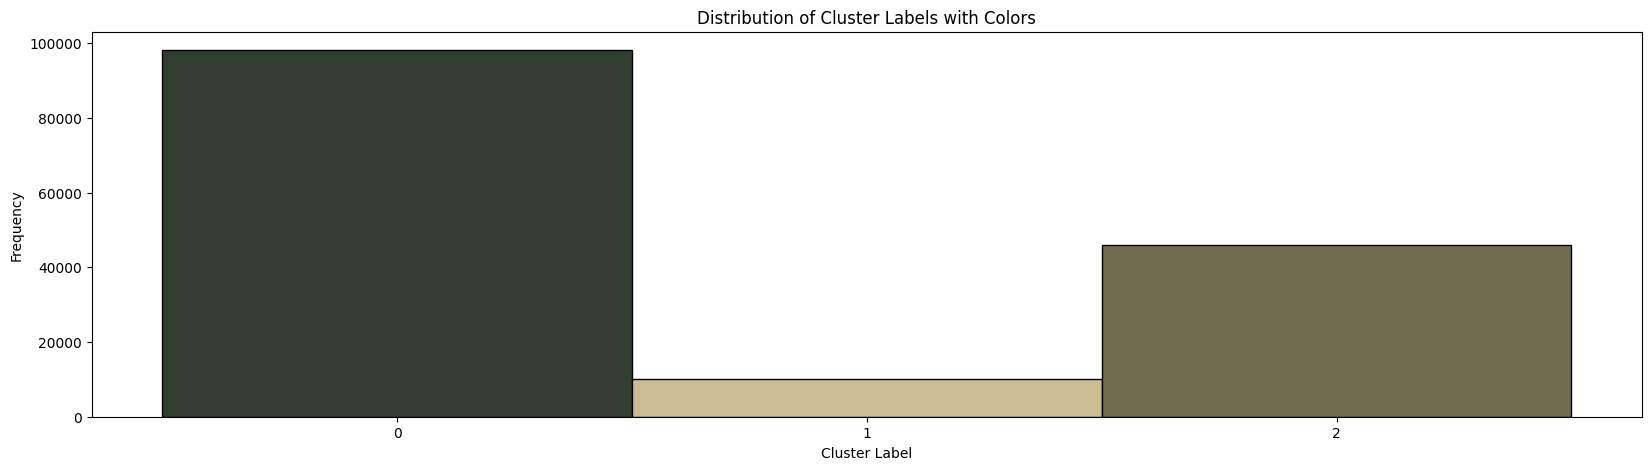

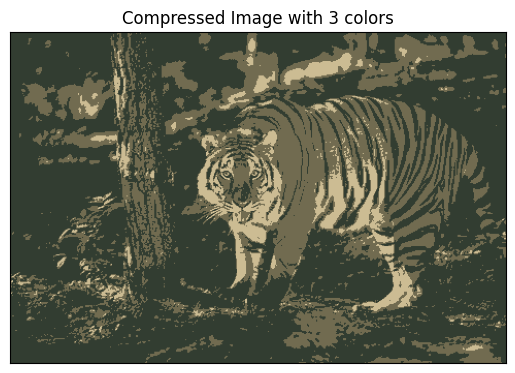

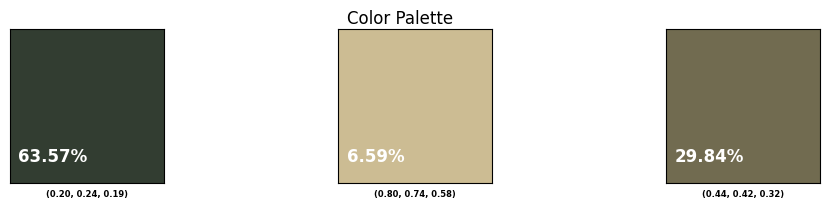

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from sklearn.cluster import KMeans
from scipy import ndimage
import seaborn as sns

# Load the image
image_path = '/108005.jpg'
image = plt.imread(image_path) / 255
print(image.shape)

# Display the original image
plt.imshow(image)
plt.title("Original Image")
plt.xticks([])
plt.yticks([])
plt.show()

# Reshape the image into a 2D array for K-Means clustering
image_1d = image.reshape(image.shape[0] * image.shape[1], image.shape[2])

# Perform K-Means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(image_1d)

# Calculate the frequency of each cluster label
unique_labels, counts = np.unique(kmeans.labels_, return_counts=True)
label_frequencies = dict(zip(unique_labels, counts))

# Create a custom bar plot to visualize the distribution of cluster labels and their respective colors
fig, ax = plt.subplots(figsize=(20, 5))
bar_width = 1

# Plot a colored bar for each cluster label
for label, frequency in label_frequencies.items():
    color = kmeans.cluster_centers_[label]
    ax.bar(label, frequency, color=color, width=bar_width, edgecolor='black', linewidth=1)

# Set plot labels and title
ax.set_xlabel("Cluster Label")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Cluster Labels with Colors")
ax.set_xticks(range(n_clusters))

plt.show()

# Recreate the compressed image using the cluster centers
compressed_image = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = compressed_image.reshape(image.shape[0], image.shape[1], image.shape[2])

# Display the compressed image
plt.imshow(compressed_image)
plt.title(f"Compressed Image with {n_clusters} colors")
plt.xticks([])
plt.yticks([])
plt.show()

# Create a color palette based on cluster centers
color_palette = kmeans.cluster_centers_

# Display the color palette as individual color swatches
colors = []
plt.figure(figsize=(12, 2))
total_pixels = image.shape[0] * image.shape[1]

for i, col in enumerate(color_palette, 1):
    plt.subplot(1, n_clusters, i)
    
    colors.append(col)
    
    # Create a color swatch filled with the current cluster center color
    swatch = np.zeros((100, 100, 3), dtype='float')
    swatch[:, :, :] = col
    
    # Display the color swatch
    plt.imshow(swatch)
    plt.xticks([])
    plt.yticks([])
    
    # Display the color percentage
    percentage = label_frequencies[i-1] / total_pixels * 100
    plt.text(5, 85, f"{percentage:.2f}%", fontsize=12, color='w', weight='bold')
    
    # Display the RGB values below the color swatch
    plt.xlabel(f"({col[0]:.2f}, {col[1]:.2f}, {col[2]:.2f})", fontsize=6, color='k', weight='bold')
    
# Add a title for the color palette
plt.suptitle("Color Palette")
plt.show()
